Набор данных - Drug classification - https://www.kaggle.com/prathamtripathi/drugclassification
    
Тип классификаторов - SVM (метод опорных векторов), логистическая регрессия, случайный лес.

Классификация по столбцу - Drug Type (DrugA – класс 0, остальные уровни – класс 1)

In [1]:
import pandas as pd 
import numpy as np
import io
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# Прочитаем данные и приведем их к формату, необходимому для построения классификатора. 
data = pd.read_csv('drug200.csv')
data['Drug'] = np.where(data['Drug'] == 'drugA', 0, 1)
data['Sex'] = np.where(data['Sex'] == 'M', 1, 0)
data['Cholesterol'] =  np.where(data['Cholesterol'] == "HIGH", 1, 0)
data = pd.get_dummies(data, columns=['BP'])
data = data.drop(columns= ['BP_LOW'])
data_sel = data.loc[:, data.columns.isin(['Age', 'Sex','BP_HIGH','BP_NORMAL', 'Cholesterol', 'Na_to_K'])]
data_sel = data_sel.dropna()
drug = data.loc[:, data.columns.isin(['Drug'])]

# разделим данные на обучающую и тестовые выборки 
X_train, X_test, y_train, y_test = train_test_split(data_sel, drug, test_size=0.3)

In [2]:
data

,Age,Sex,Cholesterol,Na_to_K,Drug,BP_HIGH,BP_NORMAL
0,23,0,1,25.355,1,1,0
1,47,1,1,13.093,1,0,0
2,47,1,1,10.114,1,0,0
3,28,0,1,7.798,1,0,1
4,61,0,1,18.043,1,0,0
...,...,...,...,...,...,...,...
195,56,0,1,11.567,1,0,0
196,16,1,1,12.006,1,0,0
197,52,1,1,9.894,1,0,1
198,23,1,0,14.020,1,0,1


<Axes: >

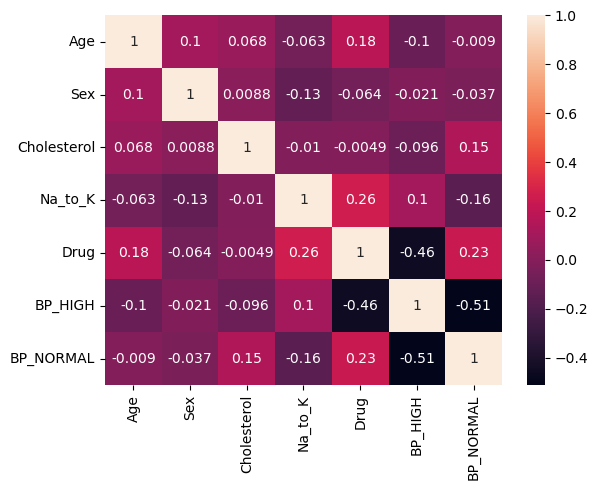

In [2]:
#Рассчитаем корреляцию между переменными изобразим ее с помощью heatmap.

import seaborn as sns

sns.heatmap(data.corr(),annot=True)


Можно заметить, что между BP_HIGH и BP_NORMAl довольно большая корреляция, при этом обе эти переменные неплохо коррелируют с 
переменной Drug. Также у BP_NORMAl есть взаимосвязи с другими переменными.

In [3]:
# Для построения классификатора применим логистическую регрессия с обучением SGD, используя регуляризацию
#типа L2.

clf = SGDClassifier(loss="log_loss", penalty="l2")
clf.fit(X_train, y_train.values.ravel())

SGDClassifier(loss='log_loss')

In [4]:
# рассчитаем accuracy, precision и recall и F-меру у данного классификатора 
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("accuracy:",accuracy,"\nprecision:", precision,"\nrecall:", recall,"\nf1-score:", f1)

accuracy: 0.9166666666666666 
precision: 0.8402777777777778 
recall: 0.9166666666666666 
f1-score: 0.8768115942028986


C:\Users\nikit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Основные метрики > 0.8, точность классификатора неплохая 

In [5]:
#Для построения второго классификатора применим логистическую регрессию 
# используя алгоритм lemited memory BFGS.
clf2 = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial') 
clf2.fit(X_train, y_train.values.ravel())

LogisticRegression(multi_class='multinomial', random_state=0)

In [6]:
# рассчитаем accuracy, precision и recall и F-меру у данного классификатора 
y_pred = clf2.predict(X_test)
accuracy = clf2.score(X_test, y_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("accuracy:",accuracy,"\nprecision:", precision,"\nrecall:", recall,"\nf1-score:", f1)

accuracy: 0.9833333333333333 
precision: 0.9836309523809523 
recall: 0.9833333333333333 
f1-score: 0.9824824824824823


Основные метрики очень близки к 1, что говорит о высокой точности данного классификатора 

In [7]:
# Построим классификатор типа SVC
clf3 = svm.SVC(gamma='auto')
clf3.fit(X_train, y_train.values.ravel())


SVC(gamma='auto')

In [8]:
# рассчитаем accuracy, precision и recall и F-меру у данного классификатора 
y_pred = clf3.predict(X_test)
accuracy = clf3.score(X_test, y_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("accuracy:",accuracy,"\nprecision:", precision,"\nrecall:", recall,"\nf1-score:", f1)

accuracy: 0.9166666666666666 
precision: 0.8951149425287356 
recall: 0.9166666666666666 
f1-score: 0.8999157184997892


In [9]:
# Применим линейный SVM классификатор, изпользуя 
# Multi-class classification (многоклассовую классификацию)
lin_clf = svm.LinearSVC(dual="auto") 
#penalty='l2' as default
lin_clf.fit(X_train, y_train.values.ravel())

LinearSVC(dual='auto')

In [10]:
# рассчитаем accuracy, precision и recall и F-меру у данного классификатора 
y_pred = lin_clf.predict(X_test)
accuracy = lin_clf.score(X_test, y_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("accuracy:",accuracy,"\nprecision:", precision,"\nrecall:", recall,"\nf1-score:", f1)

accuracy: 0.9833333333333333 
precision: 0.9836309523809523 
recall: 0.9833333333333333 
f1-score: 0.9824824824824823


Основные метрики очень близки к 1, что говорит о высокой точности данного классификатора. К тому же данный классификатор
оказался лучше предыдущего. Линейный SVM классификатор, показывает лучшую точность чем базовый. 

## Построим классификатор типа случайный лес 

In [11]:
clf_forest = RandomForestClassifier()
clf_forest.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

In [12]:
# рассчитаем accuracy, precision и recall и F-меру у данного классификатора 
y_pred = clf_forest.predict(X_test)
accuracy = clf_forest.score(X_test, y_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("accuracy:",accuracy,"\nprecision:", precision,"\nrecall:", recall,"\nf1-score:", f1)

accuracy: 0.9833333333333333 
precision: 0.9836309523809523 
recall: 0.9833333333333333 
f1-score: 0.9824824824824823


In [18]:
# Подберем лучшее количество деревьев в лесу. 
#Для этого используем два цикла с разным шагом
params = {'n_estimators': [i for i in range(50, 500, 50)]}
gsc=GridSearchCV(clf_forest, params,cv = 4)
gsc.fit(X_train,y_train.values.ravel())
gsc.best_estimator_

RandomForestClassifier(n_estimators=50)

После первой итерации получили, что лучшее значение = 50.

In [20]:
#Вторая итерация 
params = {'n_estimators':[i for i in range(10, 100, 10)]}
gsc=GridSearchCV(clf_forest, params,cv = 4)
gsc.fit(X_train,y_train.values.ravel())
gsc.best_estimator_

RandomForestClassifier(n_estimators=20)

In [21]:
#Построим случайный лес с лучшим количеством деревьев
clf_forest_best = RandomForestClassifier(n_estimators=20)
clf_forest_best.fit(X_train, y_train.values.ravel())

RandomForestClassifier(n_estimators=20)

In [29]:
# рассчитаем accuracy, precision и recall и F-меру у данного классификатора 
y_pred = clf_forest_best.predict(X_test)
accuracy = clf_forest_best.score(X_test, y_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("accuracy:",accuracy,"\nprecision:", precision,"\nrecall:", recall,"\nf1-score:", f1)

accuracy: 0.9833333333333333 
precision: 0.9836309523809523 
recall: 0.9833333333333333 
f1-score: 0.9824824824824823


In [30]:
# переберем другие гипер параметры

params = {
    "n_estimators":[20],
    "max_depth":[10, 50, 100],
    "max_features":[6,8,10,12,14,16]}

gsc=GridSearchCV(clf_forest, params,cv = 4)
gsc.fit(X_train,y_train.values.ravel())
gsc.best_estimator_

RandomForestClassifier(max_depth=100, max_features=6, n_estimators=20)

In [31]:
#Построим лучшую версию случайного леса
clf_forest_best_2 = RandomForestClassifier(max_depth = 100, max_features = 6, n_estimators=20)
clf_forest_best_2.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_depth=100, max_features=6, n_estimators=20)

In [32]:
# рассчитаем accuracy, precision и recall и F-меру у данного классификатора 
y_pred = clf_forest_best_2.predict(X_test)
accuracy = clf_forest_best_2.score(X_test, y_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("accuracy:",accuracy,"\nprecision:", precision,"\nrecall:", recall,"\nf1-score:", f1)

accuracy: 0.9833333333333333 
precision: 0.9836309523809523 
recall: 0.9833333333333333 
f1-score: 0.9824824824824823


Вывод: Перебор гиперпараметров не повлиял на точность классификатора. Это обусловленно тем, 
что первая версия случайного леса и так имела точность близкую к еденице. 
